# Project: Movie Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [367]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [38]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#missing data - movie_df.info()
#duplicates - 
#incorrect types - 
movie_df.info()
movie_df.duplicated()

AttributeError: 'Series' object has no attribute 'info'

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [99]:
#Missing data is not an issue as it can't be filled with anything to provide useful analysis. We care about Budget, Revenue, and Cast
#I do need to find a way to search on a cast member.
cast_movie_df = movie_df['cast'].str.replace('|',',')
new_df = cast_movie_df.str.split(',',4, expand=True)
new_df.to_csv('cast.csv', index=False,header=['cast_member1','cast_member2','cast_member3','cast_member4','cast_member5'])
fixed_cast_df = pd.read_csv('cast.csv')


### Compute Profit for each movie in the database

In [100]:
df_prof = clean_movie_df['revenue'] - clean_movie_df['budget']
df_prof.to_csv('profit.csv', index=False,header=['profit'])


In [101]:
#adjusted

df_adj= clean_movie_df['revenue_adj'] - clean_movie_df['budget_adj']
df_adj.to_csv('profit_adj.csv', index=False,header=['profit_adj'])

In [102]:
#get the cleaned and modified data
fixed_prof_df = pd.read_csv('profit.csv')
fixed_prof_adj_df = pd.read_csv('profit_adj.csv')
clean_movie_df = pd.concat([movie_df, fixed_cast_df, fixed_prof_df,fixed_prof_adj_df], axis=1)
clean_movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_year,budget_adj,revenue_adj,cast_member1,cast_member2,cast_member3,cast_member4,cast_member5,profit,profit_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,2015,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,1363528810,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,2015,1.379999e+08,3.481613e+08,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,228436354,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,185238201,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,2015,1.839999e+08,1.902723e+09,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,1868178225,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2015,1.747999e+08,1.385749e+09,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,1316249360,1.210949e+09


In [104]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
clean_movie_df.sort_values(['profit_adj'], ascending=False)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_year,budget_adj,revenue_adj,cast_member1,cast_member2,cast_member3,cast_member4,cast_member5,profit,profit_adj
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,1977,3.957559e+07,2.789712e+09,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Cushing,Alec Guinness,764398007,2.750137e+09
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,2009,2.408869e+08,2.827124e+09,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,Michelle Rodriguez,2544505847,2.586237e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,1997,2.716921e+08,2.506406e+09,Kate Winslet,Leonardo DiCaprio,Frances Fisher,Billy Zane,Kathy Bates,1645034188,2.234714e+09
10594,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,...,1973,3.928928e+07,2.167325e+09,Linda Blair,Max von Sydow,Ellen Burstyn,Jason Miller,Lee J. Cobb,433306145,2.128036e+09
9806,578,tt0073195,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,...,1975,2.836275e+07,1.907006e+09,Roy Scheider,Robert Shaw,Richard Dreyfuss,Lorraine Gary,Murray Hamilton,463654000,1.878643e+09
8889,601,tt0083866,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,http://www.et20.com/,Steven Spielberg,He is afraid. He is alone. He is three million...,...,1982,2.372625e+07,1.791694e+09,Henry Thomas,Drew Barrymore,Robert MacNaughton,Dee Wallace,Peter Coyote,782410554,1.767968e+09
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,2015,1.839999e+08,1.902723e+09,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,1868178225,1.718723e+09
8094,1642,tt0113957,1.136610,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,NaN,Irwin Winkler,Her driver's license. Her credit cards. Her ba...,...,1995,3.148127e+07,1.583050e+09,Sandra Bullock,Jeremy Northam,Dennis Miller,Wendy Gazelle,Ken Howard,1084279658,1.551568e+09
10110,12230,tt0055254,2.631987,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,NaN,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,...,1961,2.917944e+07,1.574815e+09,Rod Taylor,J. Pat O'Malley,Betty Lou Gerson,Martha Wentworth,Ben Wright,211880014,1.545635e+09
7309,1891,tt0080684,5.488441,18000000,538400000,The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,http://www.starwars.com/films/star-wars-episod...,Irvin Kershner,The Adventure Continues...,...,1980,4.762866e+07,1.424626e+09,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams,Anthony Daniels,520400000,1.376998e+09


In [158]:
#Find the 100 most profitable movies
df_top100 = clean_movie_df.nlargest(100,'profit_adj')
#find the 100 least profitable movies
df_bottom100 = clean_movie_df.nsmallest(100,'profit_adj')

In [168]:
#whtich cast member is in the most movies in teh top 100?
one = df_top100['cast_member1'].value_counts()
two = df_top100['cast_member2'].value_counts()
three = df_top100['cast_member3'].value_counts()
four = df_top100['cast_member4'].value_counts()
five = df_top100['cast_member5'].value_counts()
df_table = pd.DataFrame.from_records([one,two,three,four,five])
df_table.fillna(0)
Total = df_table.sum()
Total.sort_values(ascending=False)
df_top100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1329 to 9
Data columns (total 28 columns):
id                      100 non-null int64
imdb_id                 100 non-null object
popularity              100 non-null float64
budget                  100 non-null int64
revenue                 100 non-null int64
original_title          100 non-null object
cast                    100 non-null object
homepage                71 non-null object
director                100 non-null object
tagline                 98 non-null object
keywords                100 non-null object
overview                100 non-null object
runtime                 100 non-null int64
genres                  100 non-null object
production_companies    100 non-null object
release_date            100 non-null object
vote_count              100 non-null int64
vote_average            100 non-null float64
release_year            100 non-null int64
budget_adj              100 non-null float64
revenue_adj        

In [282]:

df_top100.iloc[:,[5,21,22,23,24,25,27]]   
df_top100_cleaner = df_top100.iloc[:,[5,21,22,23,24,25,27]] 
df_top100_cleaner.sort_values(by='profit_adj',ascending=False)

,original_title,cast_member1,cast_member2,cast_member3,cast_member4,cast_member5,profit_adj
1329,Star Wars,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Cushing,Alec Guinness,2.750137e+09
1386,Avatar,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,Michelle Rodriguez,2.586237e+09
5231,Titanic,Kate Winslet,Leonardo DiCaprio,Frances Fisher,Billy Zane,Kathy Bates,2.234714e+09
10594,The Exorcist,Linda Blair,Max von Sydow,Ellen Burstyn,Jason Miller,Lee J. Cobb,2.128036e+09
9806,Jaws,Roy Scheider,Robert Shaw,Richard Dreyfuss,Lorraine Gary,Murray Hamilton,1.878643e+09
8889,E.T. the Extra-Terrestrial,Henry Thomas,Drew Barrymore,Robert MacNaughton,Dee Wallace,Peter Coyote,1.767968e+09
3,Star Wars: The Force Awakens,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,1.718723e+09
8094,The Net,Sandra Bullock,Jeremy Northam,Dennis Miller,Wendy Gazelle,Ken Howard,1.551568e+09
10110,One Hundred and One Dalmatians,Rod Taylor,J. Pat O'Malley,Betty Lou Gerson,Martha Wentworth,Ben Wright,1.545635e+09
7309,The Empire Strikes Back,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams,Anthony Daniels,1.376998e+09


### Final Cleanup and some calucations
After cleaning up and getting each actor in its own column I am now able to sum the total profits for each. Then we will make it a little more readable as e^9 is hard on the human eye.

In [339]:
#With the top 100 now fill in an NaN with 0
df_top100= df_top100.fillna(0)
cast1_profit = pd.DataFrame(df_top100.groupby('cast_member1')['profit_adj'].sum())
cast2_profit = pd.DataFrame(df_top100.groupby('cast_member2')['profit_adj'].sum())
cast3_profit = pd.DataFrame(df_top100.groupby('cast_member3')['profit_adj'].sum())
cast4_profit = pd.DataFrame(df_top100.groupby('cast_member4')['profit_adj'].sum())
cast5_profit = pd.DataFrame(df_top100.groupby('cast_member5')['profit_adj'].sum())
#Fix the index name, I have to do this again but don't want to break it now.
cast1_profit.index.name = 'actor'
cast2_profit.index.name = 'actor'
cast3_profit.index.name = 'actor'
cast4_profit.index.name = 'actor'
cast5_profit.index.name = 'actor'


In [340]:
#Take each dataframe and combine back itno one. while adding the totals for each actor in the top 100.
#This is followed by code to add a column where the result is divided by 1000000, this giving a "millions" column and easier to read.

total_readable = pd.concat([cast1_profit,cast2_profit,cast3_profit,cast4_profit,cast5_profit], axis=1).sum(axis=1)
total_readable = total_readable.to_frame()
total_readable.fillna(0,inplace=True)
total_readable.index.name = 'actor'
total_readable.columns = ['profit_adj']

total_readable['MillionsAsFloat'] = total_readable.apply(lambda row: row['profit_adj']/1000000, axis=1)
total_readable.sort_values(by='profit_adj', ascending=False)

,profit_adj,MillionsAsFloat
actor,,
Harrison Ford,9.310639e+09,9310.639180
Carrie Fisher,7.028852e+09,7028.852126
Mark Hamill,7.028852e+09,7028.852126
Rupert Grint,6.979138e+09,6979.137969
Daniel Radcliffe,6.979138e+09,6979.137969
Emma Watson,6.979138e+09,6979.137969
Ian McKellen,5.926519e+09,5926.518880
Orlando Bloom,4.832051e+09,4832.050510
Michelle Rodriguez,3.797186e+09,3797.185726


In [343]:
print(total_readable.describe())

         profit_adj  MillionsAsFloat
count  3.560000e+02       356.000000
mean   1.326117e+09      1326.117185
std    1.084201e+09      1084.200918
min    6.244116e+08       624.411646
25%    6.975528e+08       697.552800
50%    9.010273e+08       901.027344
75%    1.560709e+09      1560.709041
max    9.310639e+09      9310.639180


<a id='eda'></a>
## Exploratory Data Analysis


### Profitability vs Cast - Which cast members have the most Profitable movies? 

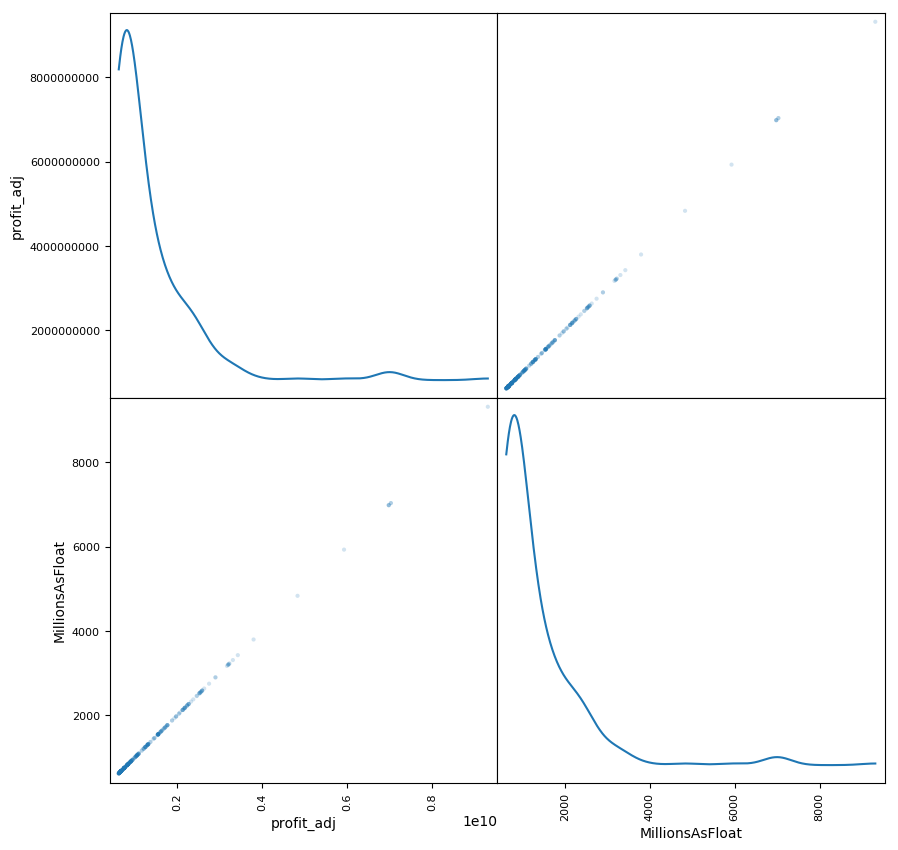

In [413]:
pd.plotting.scatter_matrix(total_readable, alpha=0.2, figsize=(10,10), diagonal='kde');
#scatter plots not much a a use here

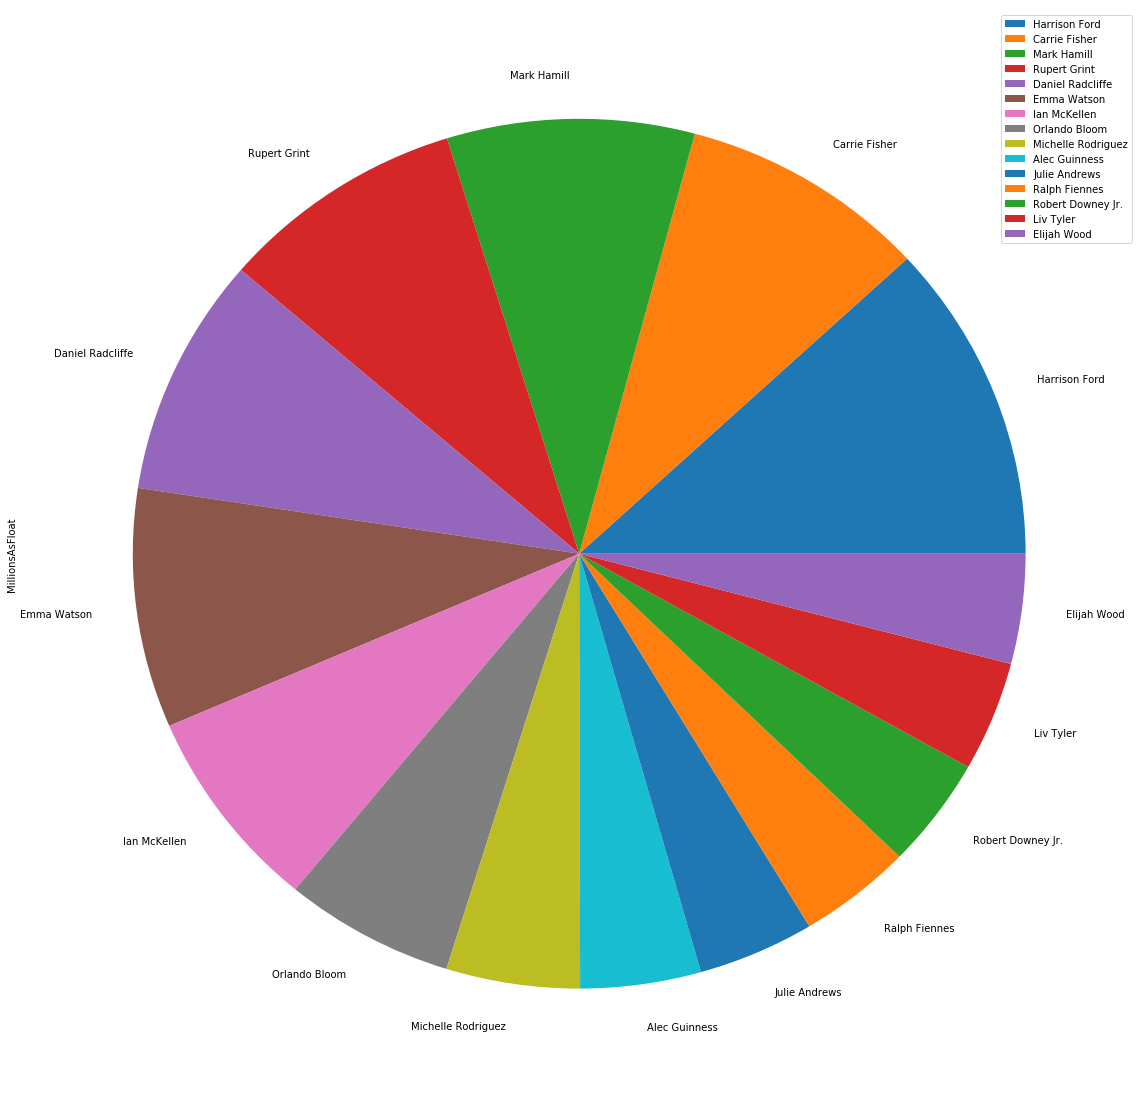

In [355]:
#Lets narrow it down to the top 15 actors
top15 = total_readable.sort_values(by='profit_adj',ascending=False).head(15)
top15.plot.pie(figsize=(20,20), y='MillionsAsFloat');

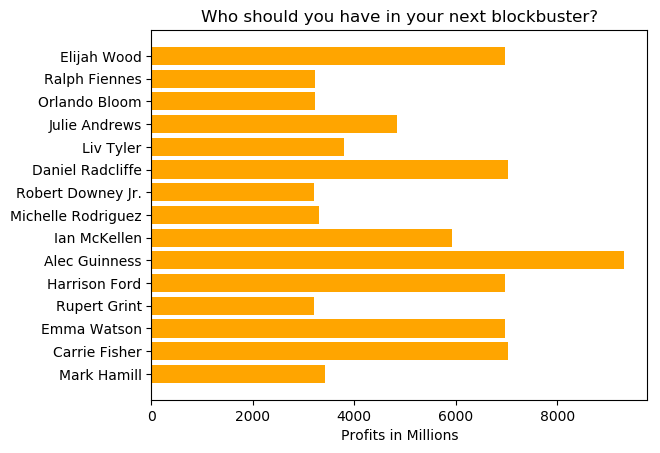

In [409]:
plt.rcdefaults()

ax = plt.subplots
y_pos = bar_top15['actor']
x_profit = bar_top15['MillionsAsFloat']

plt.barh(y_pos, x_profit, align='center', color='orange')
plt.yticks(y_pos)

#ax.set_yticklabels(y_pos)
plt.xlabel('Profits in Millions')
plt.title('Who should you have in your next blockbuster?')
plt.figure()
plt.show()

# Conclusion for Actor and Profitability
Nearly all of the top 15 actors are in multiple movies that are the top 100 are in movie "franchises". Series of films that are all in the top 100 when adjusted for inflation for 2010. The top most profitable actor according to the data is Harrison Ford. Who is not only in the top profiting Star Wars series but also Indiana Jones among others.


### At $9310 Million Harrison Ford is over 7 times more profitable than the mean for the actors in the top 100 movies.
With newer films dominating the top 100 due to the overall price of watching movies it would be an interesting followup to see total percentage of the population that attended the film while it was in theatres. As population has grown tremendously over the time period where movies have been mainstream it would be nice to know how films stack up from a general appeal to the overall population and other demographics not available in this dataset. 

### Popularity vs Profitability - Do higher rated movies make more profit?

In [416]:
clean_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 28 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

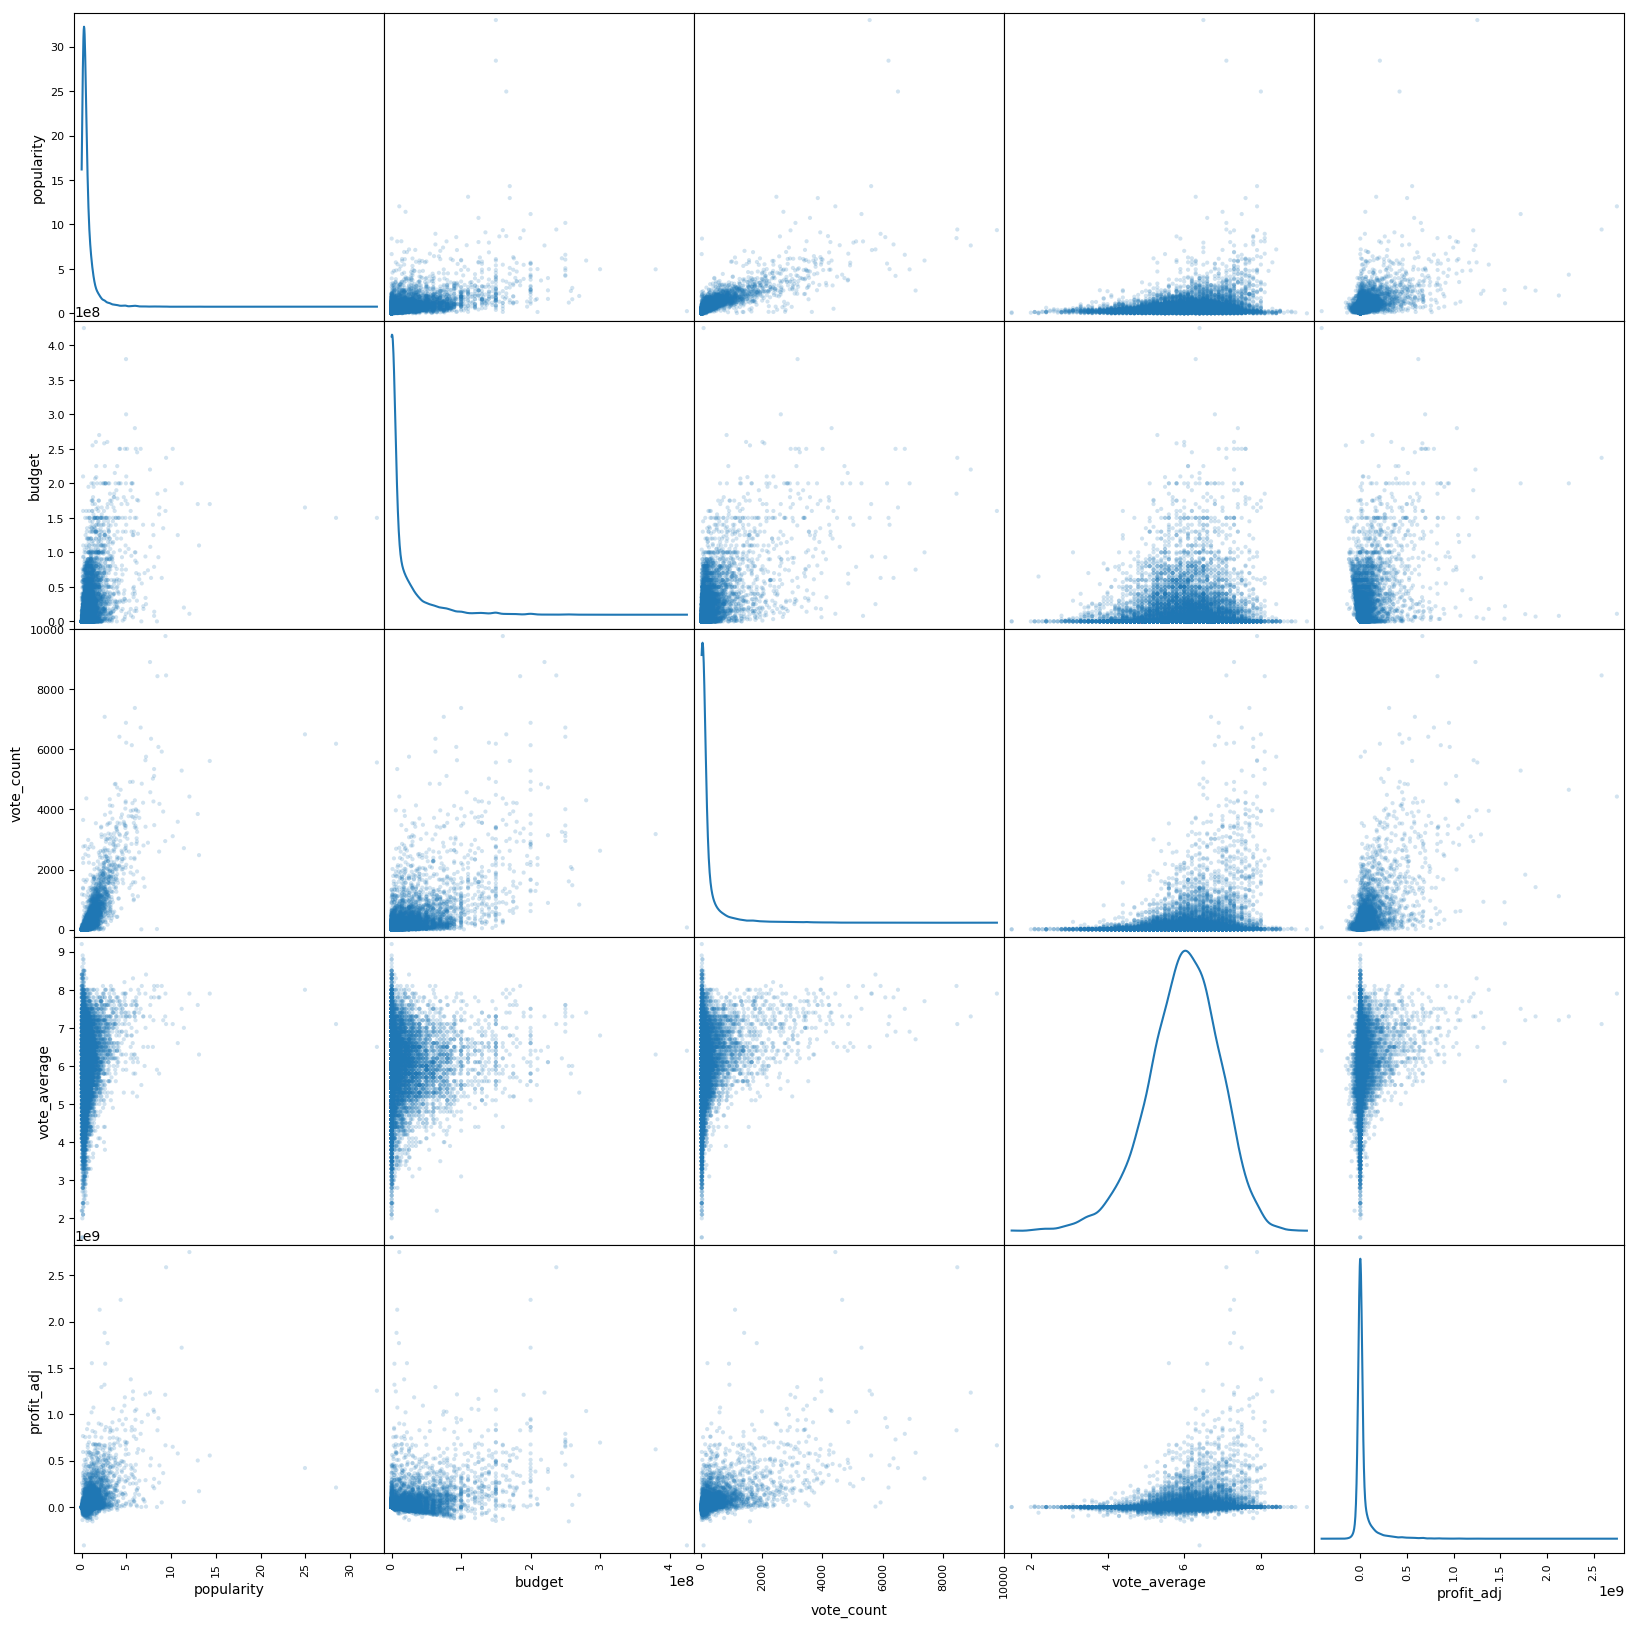

In [419]:
pd.plotting.scatter_matrix(clean_movie_df.iloc[:,[2,3,15,16,17,25,27]], alpha=0.2, figsize=(20,20), diagonal='kde');
#clean_movie_df.plot(y='popularity', x='profit_adj', kind='scatter');

I would like to see the profitability and popularity a little closer.

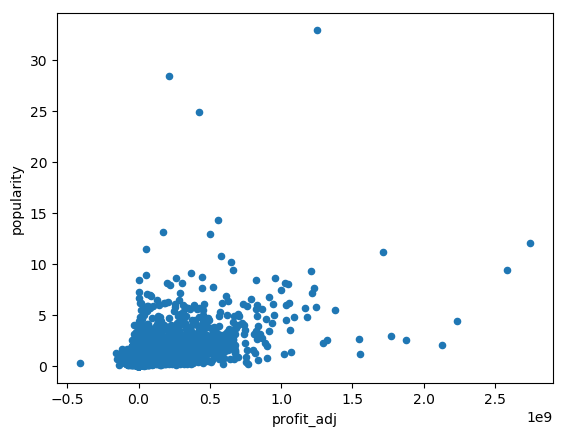

In [423]:
clean_movie_df.plot.scatter(x='profit_adj', y='popularity');

We see the outlying most profitable films are not ranked above 10 or 11, while the highest ranked movies are not the highest in profits. We can tell there there are NO films ranked above 5 that actually lost money. So if you make a badly rated/ranked film you will have the best chance of losing money. Good movies don't lose money, but some are close.

Lets see the release year compared to the ranking.
### Lets look at the release year, popularity, and vote counts

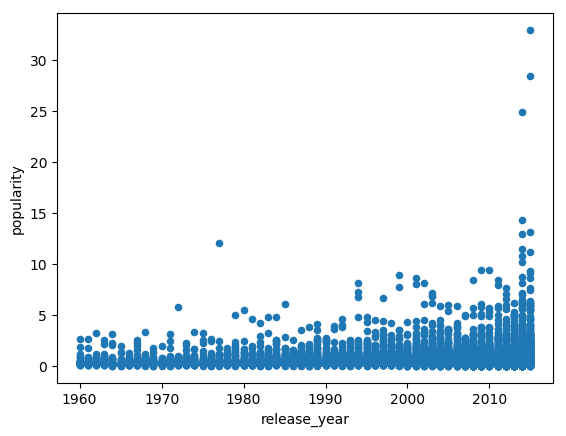

In [425]:
clean_movie_df.plot.scatter(x='release_year', y='popularity');

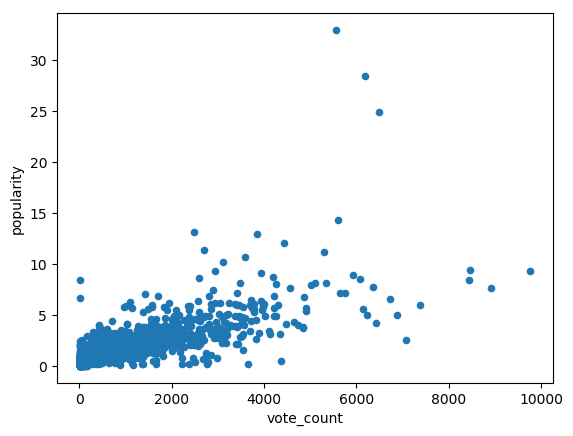

In [430]:
clean_movie_df.plot.scatter(x='vote_count', y='popularity');

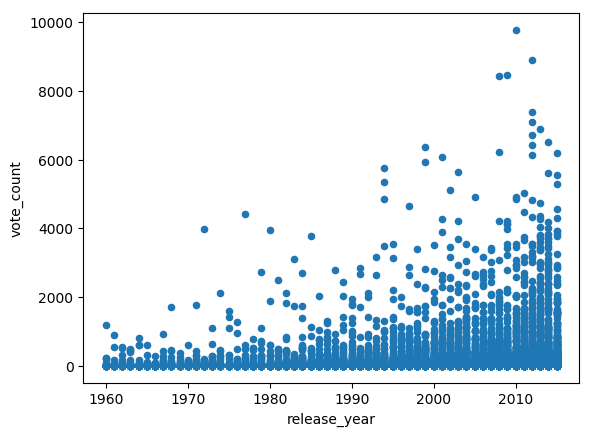

In [429]:
clean_movie_df.plot.scatter(y='vote_count', x='release_year');

### What did I learn here?
I looking close I can see the number of votes heavily weighted the results for movies released post year 2000. It is safe to say people are more likely to rate a movie the just watched via the internet site than to spend to time to review a movie they watched many years ago. 
With Profits vs Popularity, we can see while there is a strong likelyhood a bad movie will lose money or barely break even, but popular vote doesn't gaurantee the financial success of a movie.

One last thing I wanted to visualize before the final conclusions.

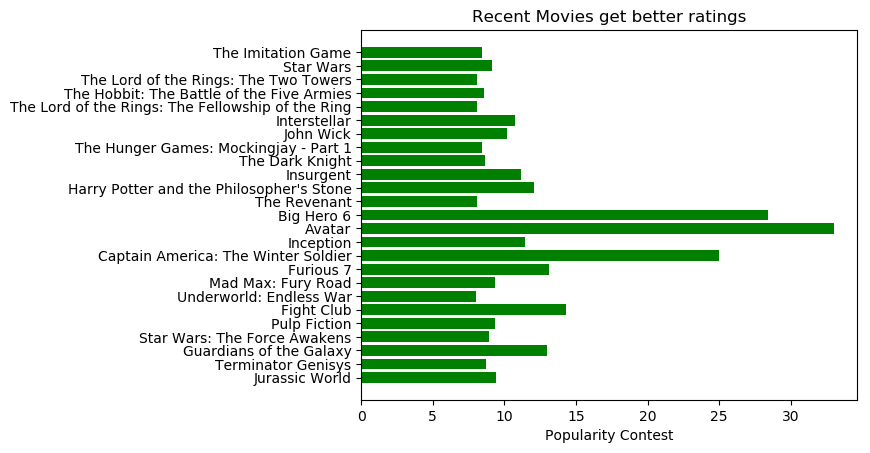

                                         original_title  release_year
0                                        Jurassic World          2015
1                                    Mad Max: Fury Road          2015
629                                        Interstellar          2014
630                             Guardians of the Galaxy          2014
2                                             Insurgent          2015
631                 Captain America: The Winter Soldier          2014
1329                                          Star Wars          1977
632                                           John Wick          2014
3                          Star Wars: The Force Awakens          2015
633               The Hunger Games: Mockingjay - Part 1          2014
634           The Hobbit: The Battle of the Five Armies          2014
1386                                             Avatar          2009
1919                                          Inception          2010
4                   

In [453]:
pop_top25 = clean_movie_df.sort_values('popularity', ascending=False).head(25)
plt.rcdefaults()

y_pos = pop_top25['original_title']
x_profit = pop_top25['popularity']
y_release_year = pop_top25['release_year']
y_ticks = "{0} {1}".format(y_pos, y_release_year)
plt.barh(y_pos, x_profit, align='center', color='green')
plt.yticks(y_pos)

plt.xlabel('Popularity Contest')
plt.title('Recent Movies get better ratings')
plt.figure()
plt.show()
print(pop_top25.iloc[:,[5,18]])

### Hunch confirmed
As I look at the top ranked movies there is very few (only 3 movies from before 2000. It would seem movies release before the proliferation of the internet are at a disadvantage. 

<a id='conclusions'></a>
##  Final Conclusions
I have tried to summarize between each section of data analysis. For my final conclusions there are 3 main points gathered from this data.
First, actors that are in multiple "series" or franchises with several films are more likely to be in the top of the list of most profitable movies. If you can get an actor to stay with a series for multiple hit movies the profits will start to add up. Most notably the $9.3B of adjusted profits for Harrison Ford.
Second, popularity does not gaurantee profitability, although the lack of high rating will almost always spell financial dissapointment.
Last, there is a certain bias for movie released after the ubiquitous use of the internet. So popularity as ranked by internet movies might not be the best scale for movie "quality", then again it is popularity not quality.